### Contents

1. Generating functions and fitting the predicted plot
2. Viewing the change in uncertainty as points are learned from 1st to 50th
3. Manipulation of beta (for distribution of error uncertainty)
4. Manipulation of theta (kernel paramters that determins complexity)

### Generate function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from numpy.linalg import inv

# Sine curve generation
X_sin = np.arange(0,1,0.02)
Y_sin = np.sin((X_sin**2) +1)

def add_noise(sigma, y_curve):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(0.05, Y_sin)

### Original Curve

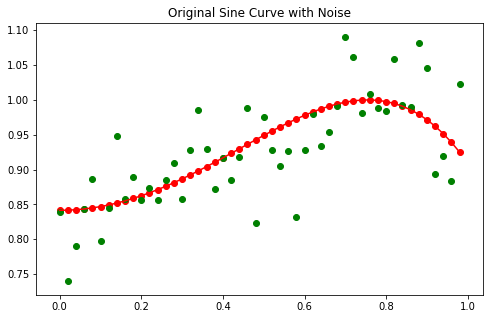

In [5]:
plt.figure(figsize=(8,5))
plt.title('Original Sine Curve with Noise')
plt.scatter(X_sin, Y_sin, c='r')
plt.plot(X_sin, Y_sin, c='r')
plt.scatter(X_sin, Y_noise, c='g')

### Gaussian Process Prediction with 50 data sets

In [6]:
from random import randint
from random import shuffle

#never let n hit the last element of the list
def kernel_val(xn, xm, theta0, theta1, theta2, theta3):
    term = (theta0 * np.exp((-theta1/2) * (abs(xn - xm)**2))) + theta2 + (theta3 * xn * xm)
    return term


# Plot sequential learning with t0, t1, t2, t3 = 1.0, 4.0, 0.0, 0.0
def plot_model(b,t0, t1, t2, t3, plot_style):
    plot_no = 1
    x_rand = [i for i in range(50)]
    shuffle(x_rand)
    rand_no_1 = x_rand[0]
    x_batch_index = [rand_no_1]
    Y_fit = []
    plot_dict = {}

    for pred_round in range(1,50):
        rand_no = x_rand[pred_round] #new selected point
        x_batch_index.append(rand_no)
        x = [X_sin[i] for i in x_batch_index]

        if pred_round == 1:   
            y_plots = []
            uncert = np.array([])
            for i in range(50):
                k = np.array([])
                C = np.array([np.array(kernel_val(x[pred_round-1], x[pred_round-1], t0,t1,t2,t3)) + (1/b)])
                t = Y_noise[rand_no_1]
                for j in range(len(x[:-1])):
                    k = np.append(k,kernel_val(x[j],X_sin[i], t0,t1,t2,t3))
                mu =  np.dot(np.dot(k.T, 1/C), t)
                uncert = np.append(uncert, (C- np.dot(np.dot(k.T, 1/C), k)))
                y_plots.append(mu)

        else:
            y_plots = []
            uncert = np.array([])
            c = kernel_val(x[pred_round],x[pred_round], t0,t1,t2,t3) + (1/b)
            k_old = np.array([])
            for j in range(len(x[:-2])):
                k_old = np.append(k_old,kernel_val(x[j],x[pred_round-1], t0,t1,t2,t3))
            C = np.append(C, k_old.T).reshape(len(C)+1, len(C))
            right_array = np.append(k_old, c).reshape(len(C),1)
            C = np.hstack((C, right_array)).reshape(len(C), len(C))
            t = [Y_noise[a] for a in x_batch_index[:pred_round]]
            C_old = C.copy()
            for i in range(50):
                k = np.array([])
                for j in range(len(x[:-1])):
                    k = np.append(k,kernel_val(x[j],X_sin[i], t0,t1,t2,t3))
                mu =  np.dot(np.dot(k.T, inv(C)), t)
                y_plots.append(mu)
                uncert = np.append(uncert, (c-np.dot(np.dot(k.T, inv(C)), k)))

        if plot_style == 'all':
            fig = plt.figure(figsize=(20,150))
            ax = fig.add_subplot(50,1, pred_round+1)
            plt.plot(X_sin, y_plots)
            plt.scatter(X_sin, y_plots)
            plt.title("Theta values = {},{},{},{}".format(t0, t1, t2, t3), fontsize=10)
            plt.scatter(X_sin, Y_sin, c='r')
            plt.plot(X_sin, Y_sin, c='r')
            plt.scatter(X_sin, Y_noise, c='g')
            plt.errorbar(X_sin, y_plots, yerr= uncert,c='plum')
            
        elif (pred_round+1) in plot_style:
            fig = plt.figure(figsize=(20,30))
            ax = fig.add_subplot(len(plot_style),1, plot_no)
            plt.plot(X_sin, y_plots)
            plt.scatter(X_sin, y_plots)
            plt.title("Theta values = {}".format(t0, t1, t2, t3), fontsize=10)
            plt.scatter(X_sin, Y_sin, c='r')
            plt.plot(X_sin, Y_sin, c='r')
            plt.scatter(X_sin, Y_noise, c='g')
            plt.errorbar(X_sin, y_plots, yerr= uncert,c='plum')
            plot_no += 1

#### Demonstrating 50 graphs (one for each point learned)
- beta = 10
- theta 0,1,2,3 = 1.0, 4.0, 0.0, 0.0

c:\users\katherine\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


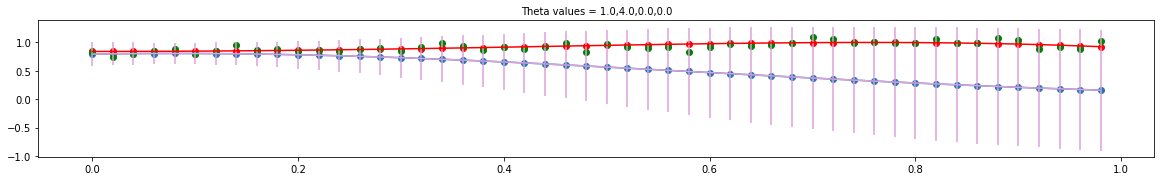

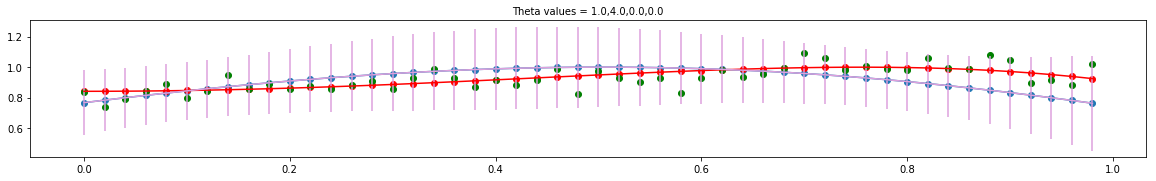

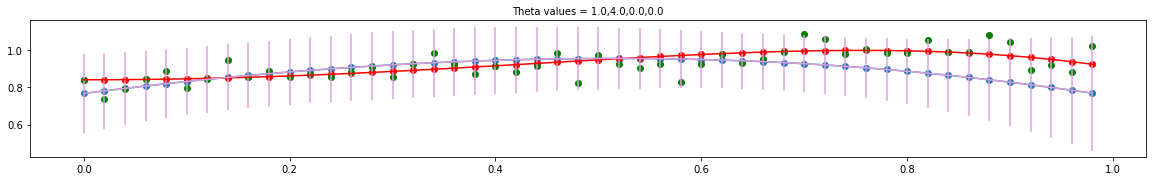

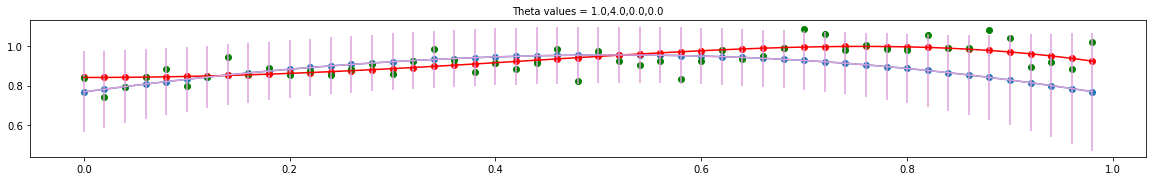

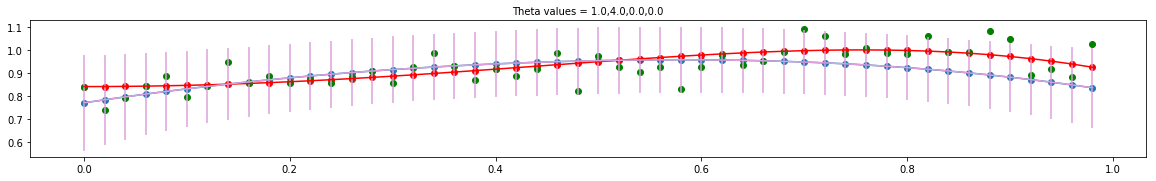

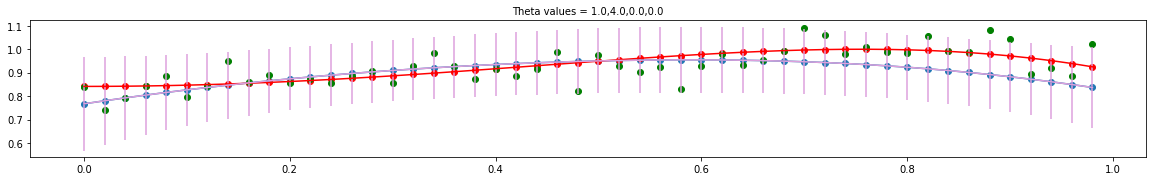

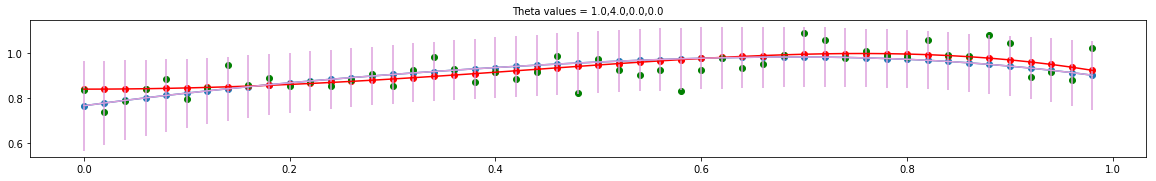

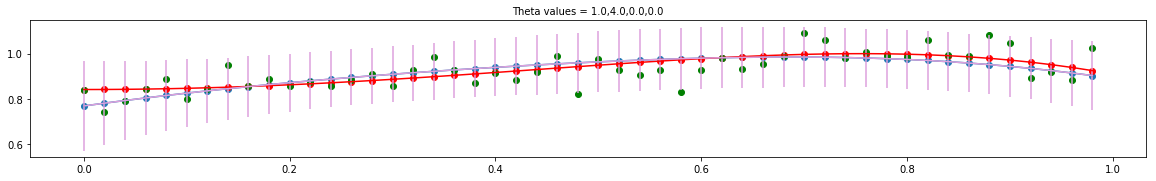

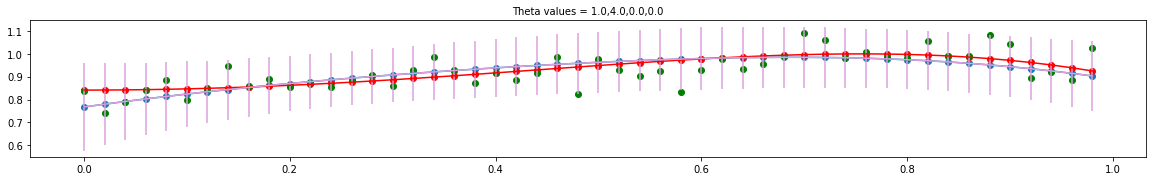

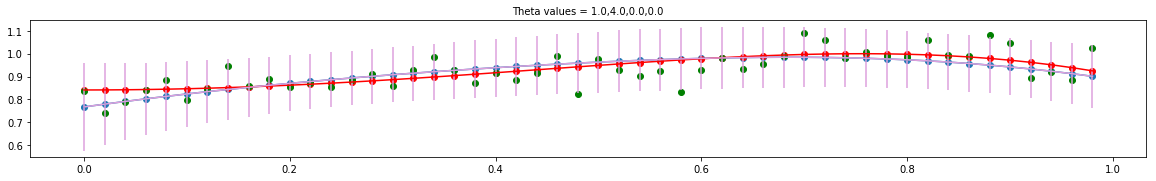

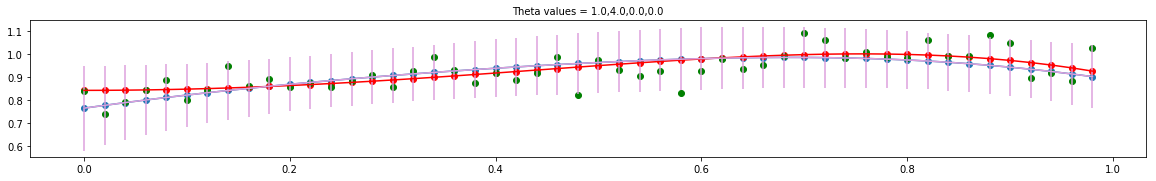

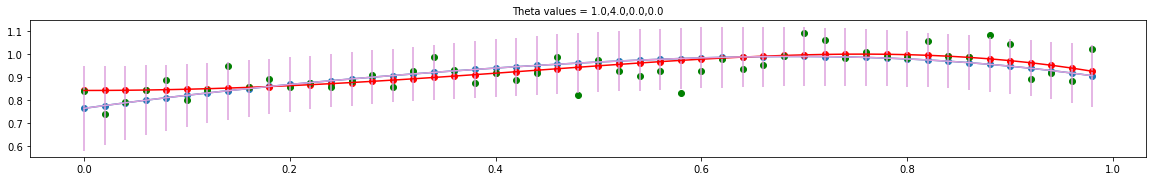

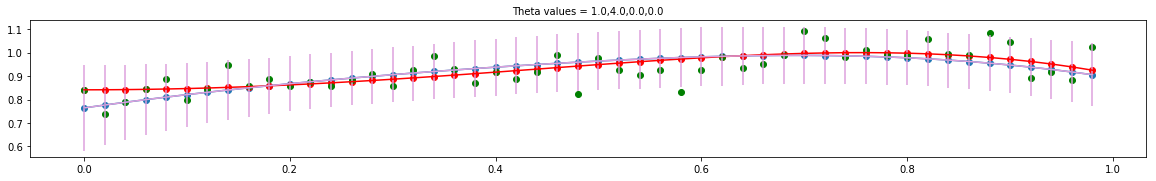

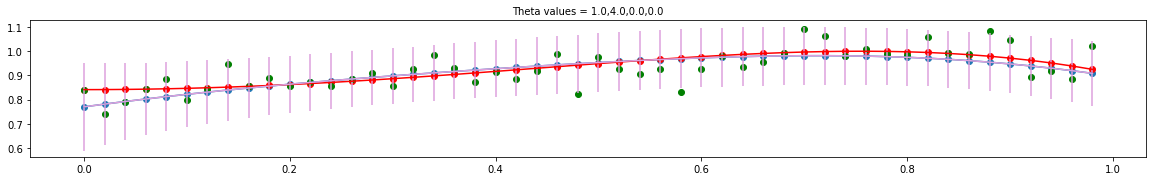

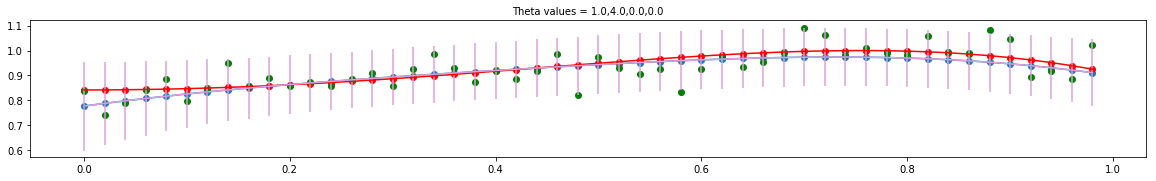

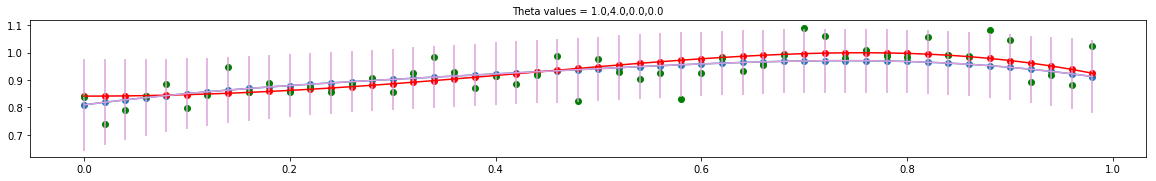

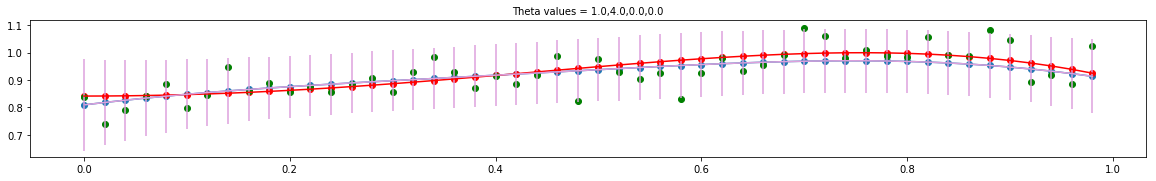

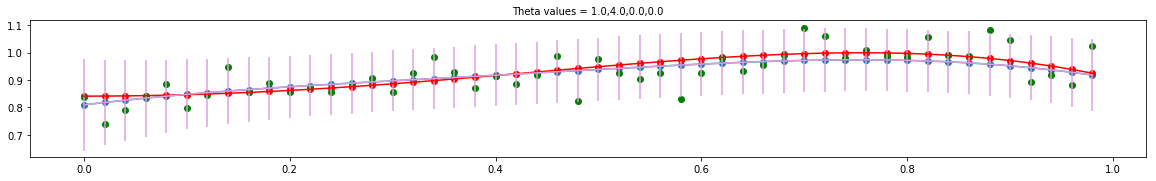

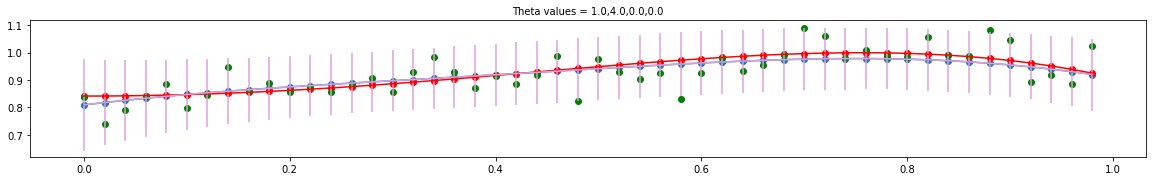

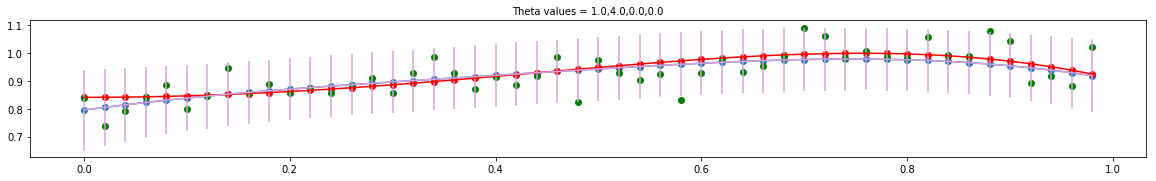

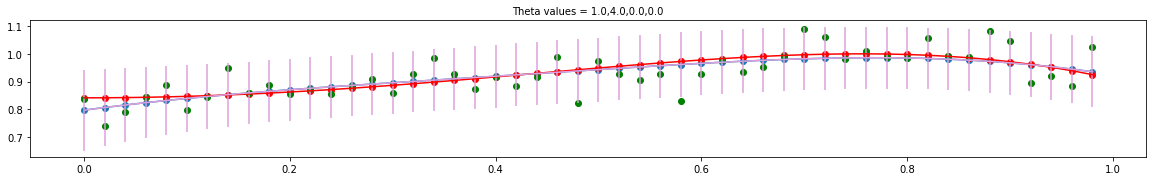

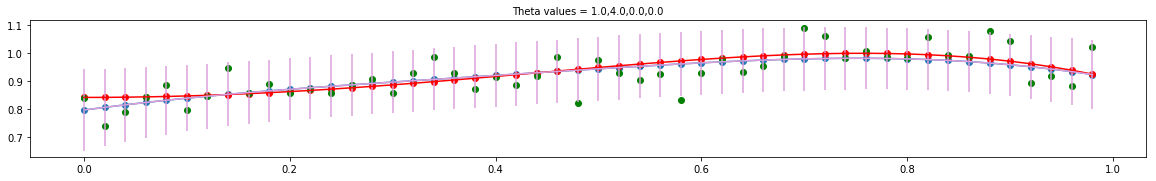

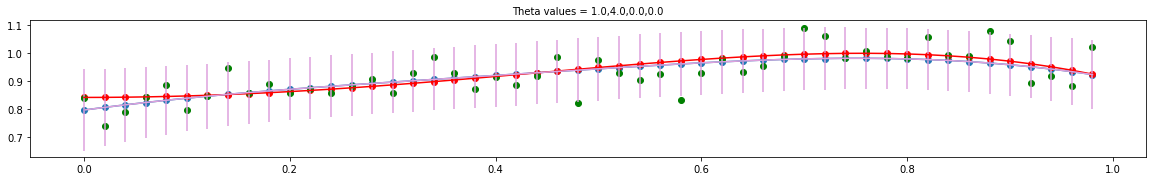

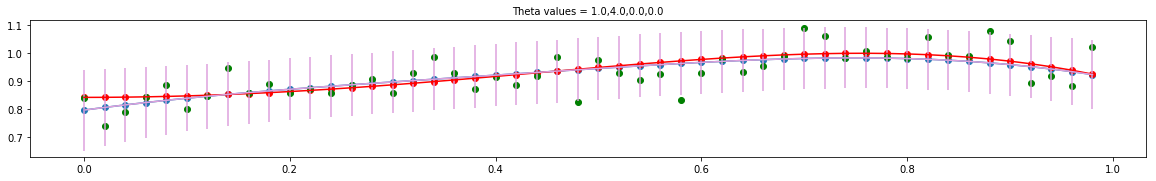

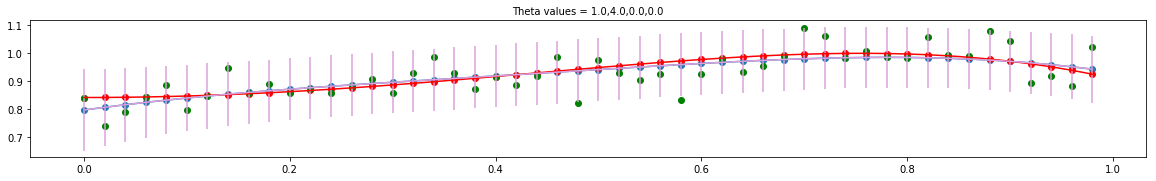

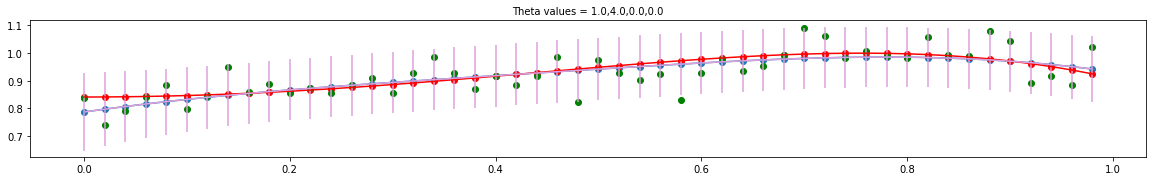

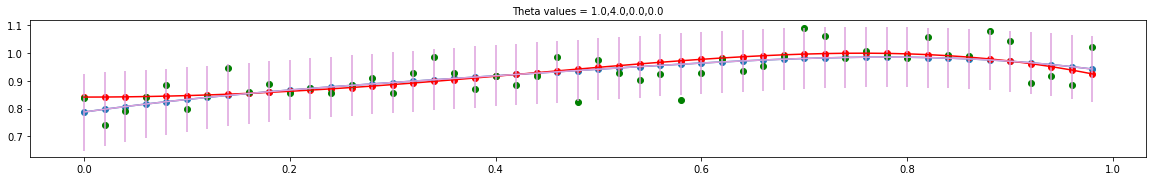

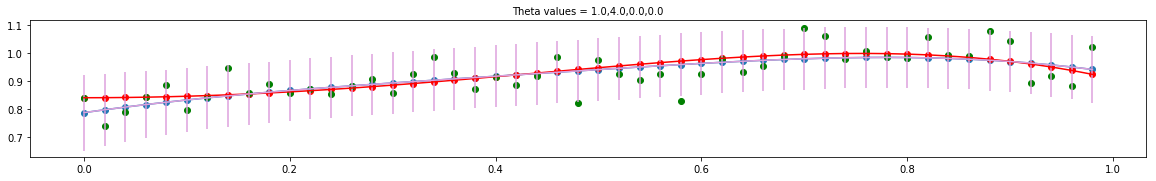

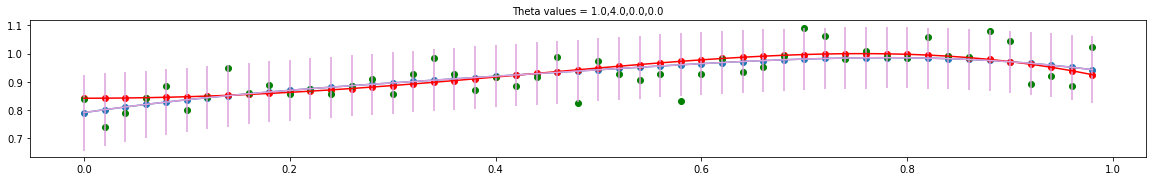

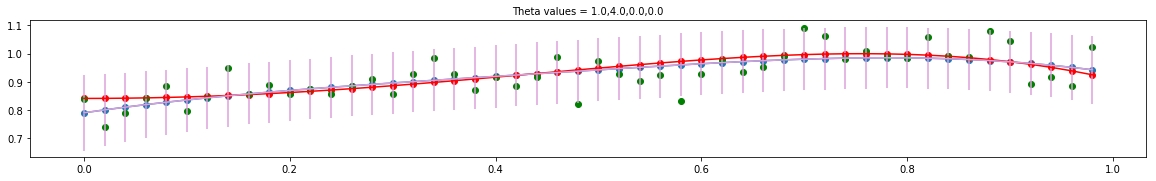

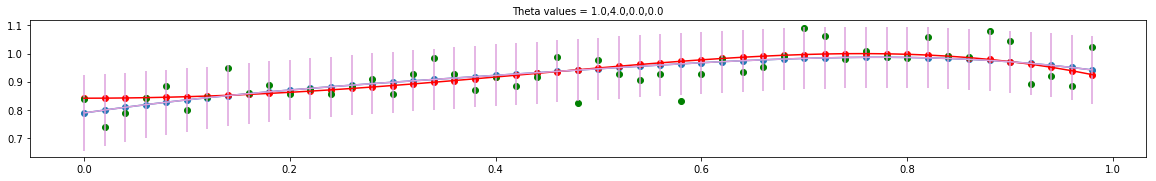

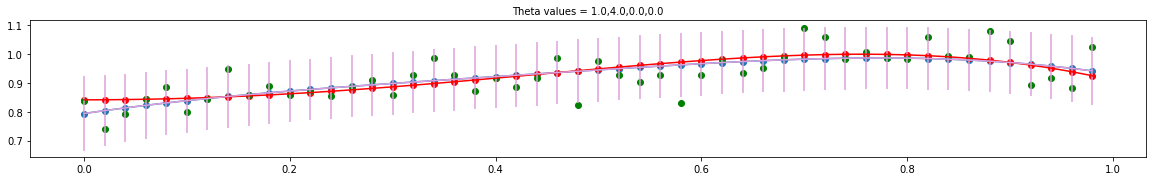

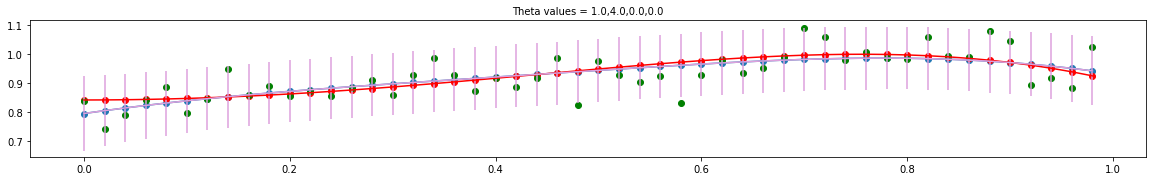

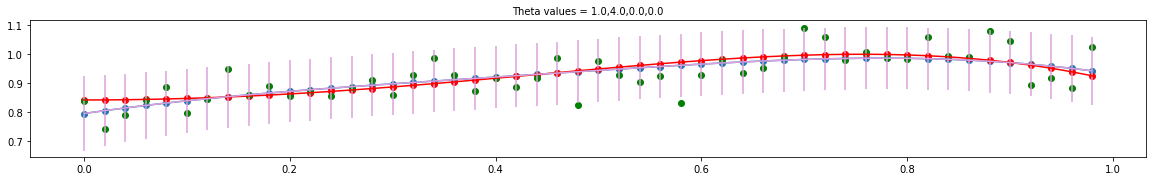

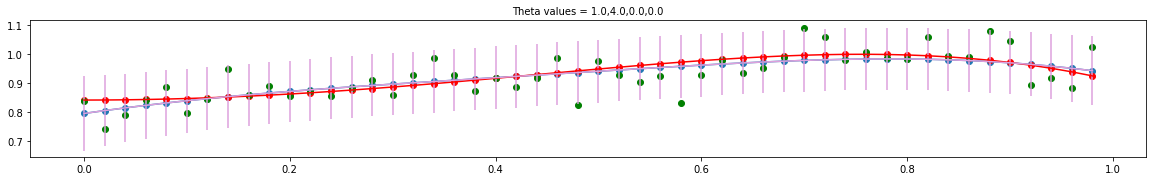

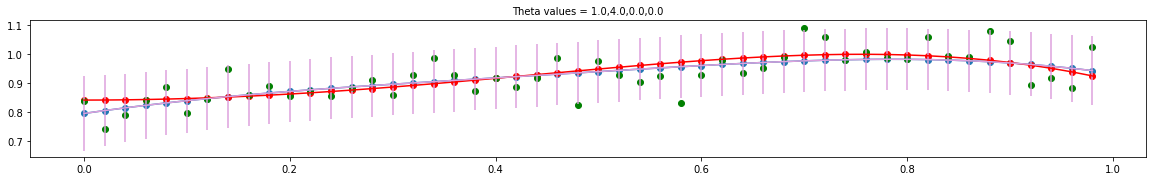

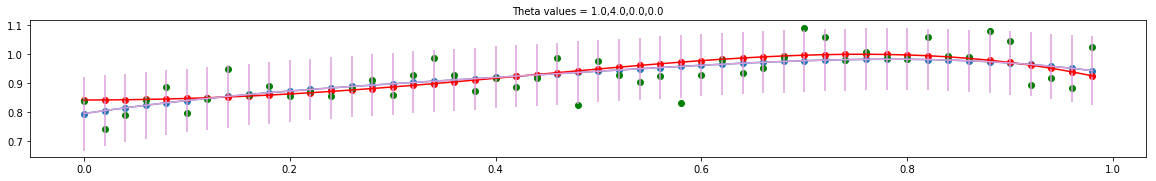

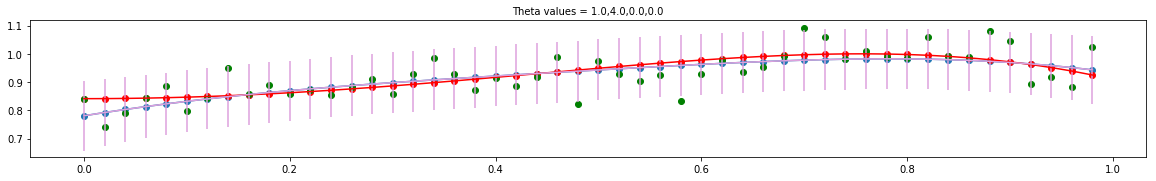

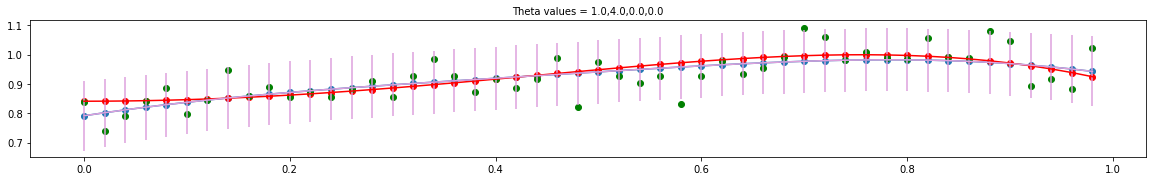

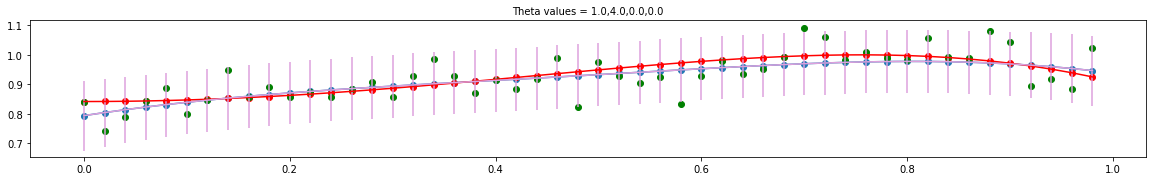

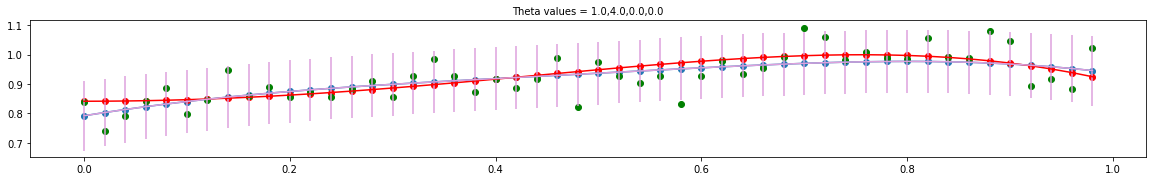

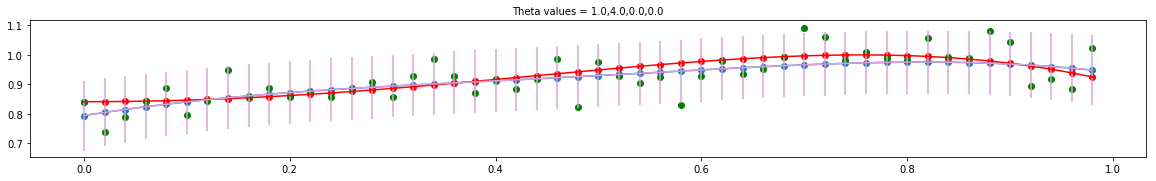

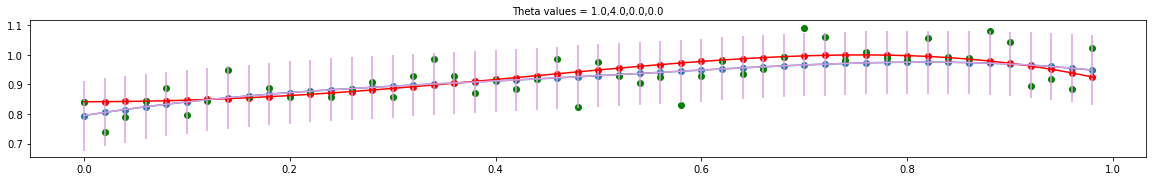

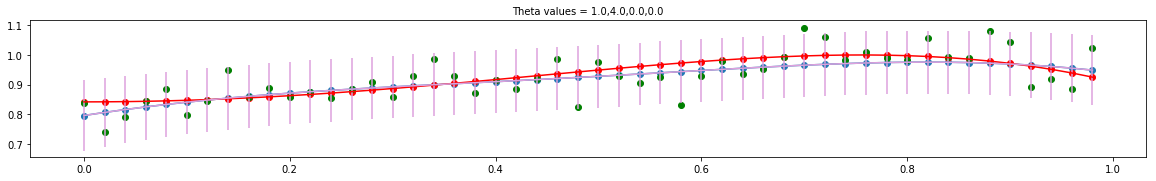

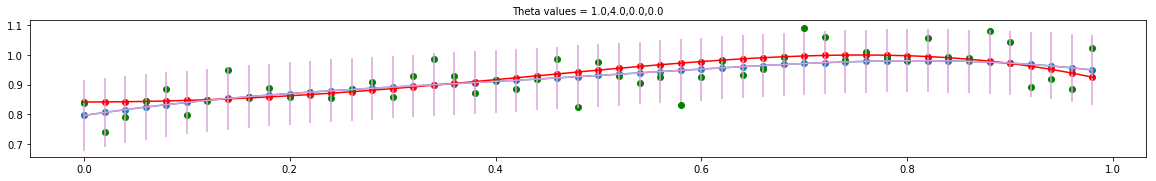

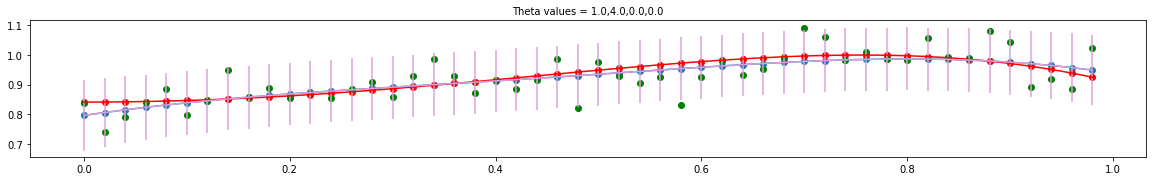

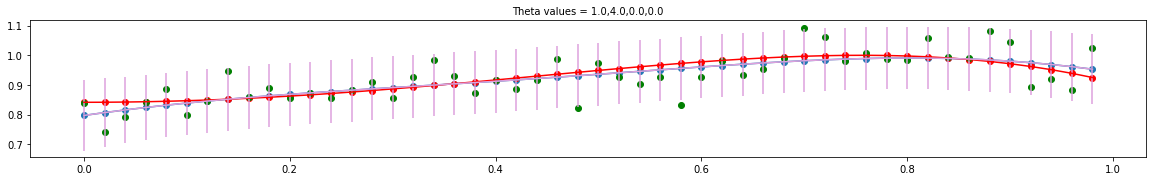

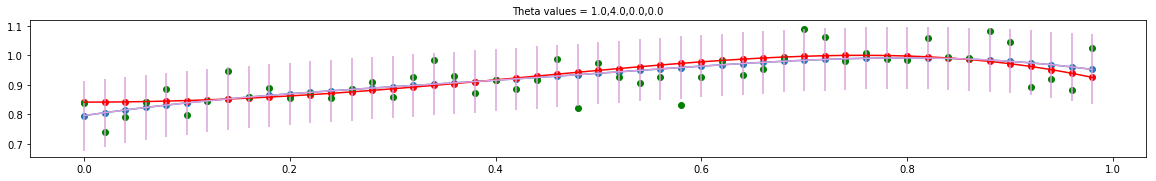

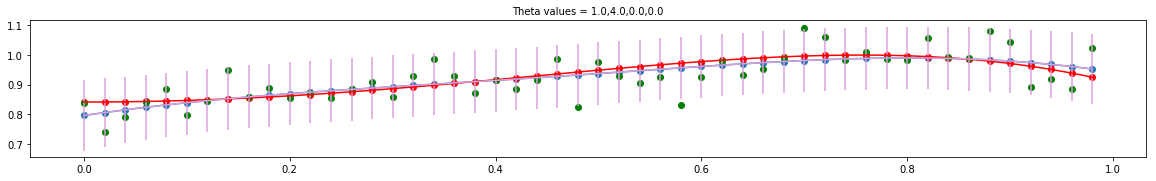

In [7]:
plot_model(10,1.0, 4.0, 0.0, 0.0, 'all')

#### Selection of graphs in process for better view (as list is reshuffled each time, is different from model above)
- 5th and 50th graph

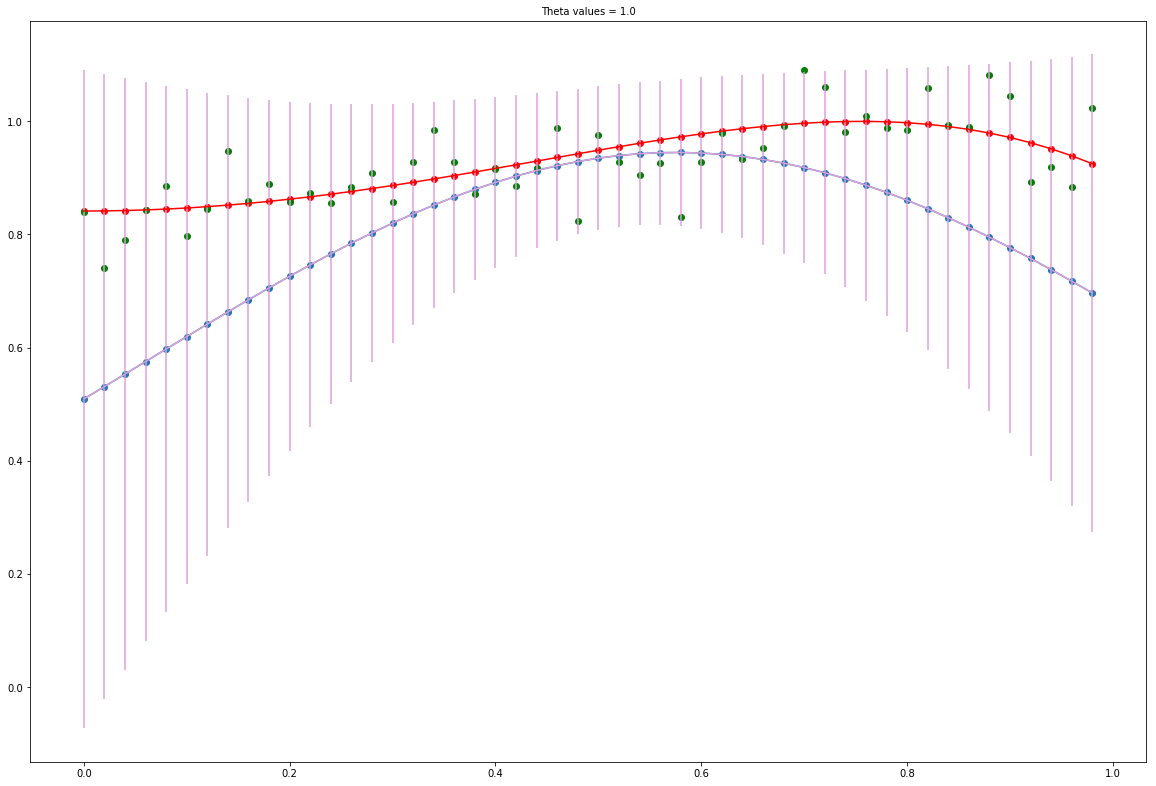

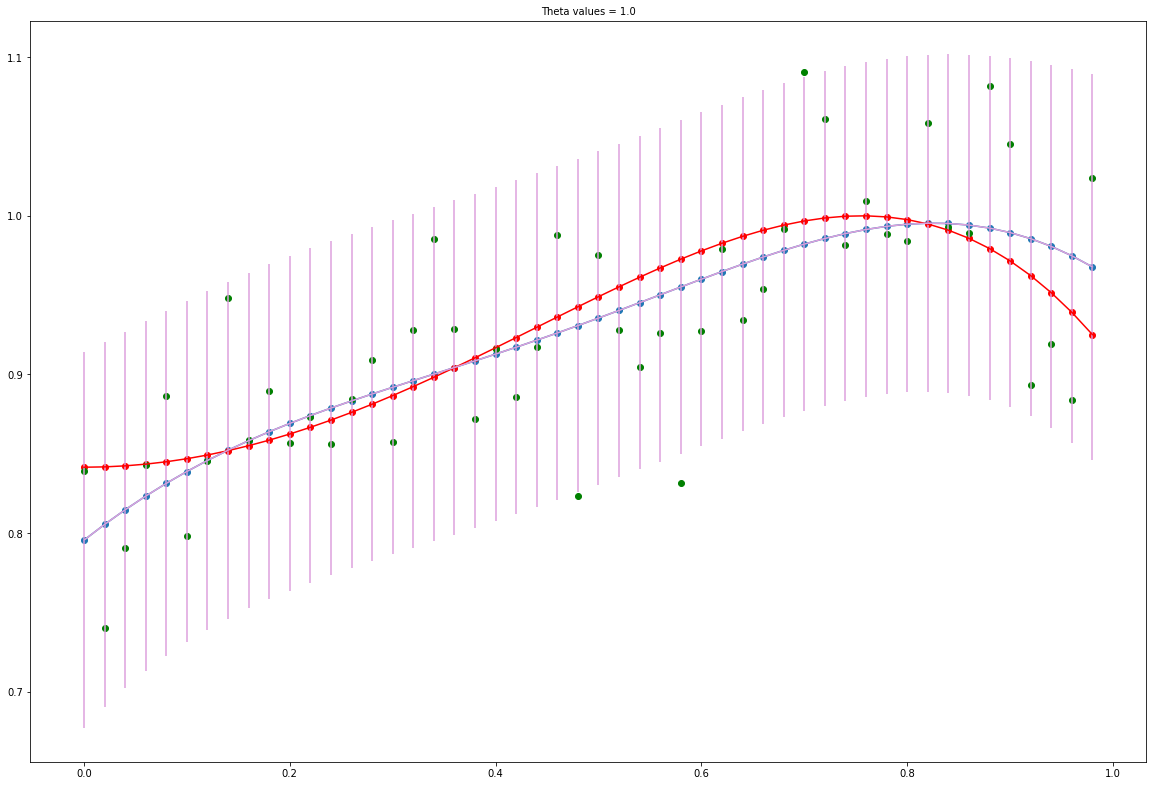

In [8]:
plot_model(10,1.0, 4.0, 0.0, 0.0, [5,50])

### Changing beta from 10 to 100

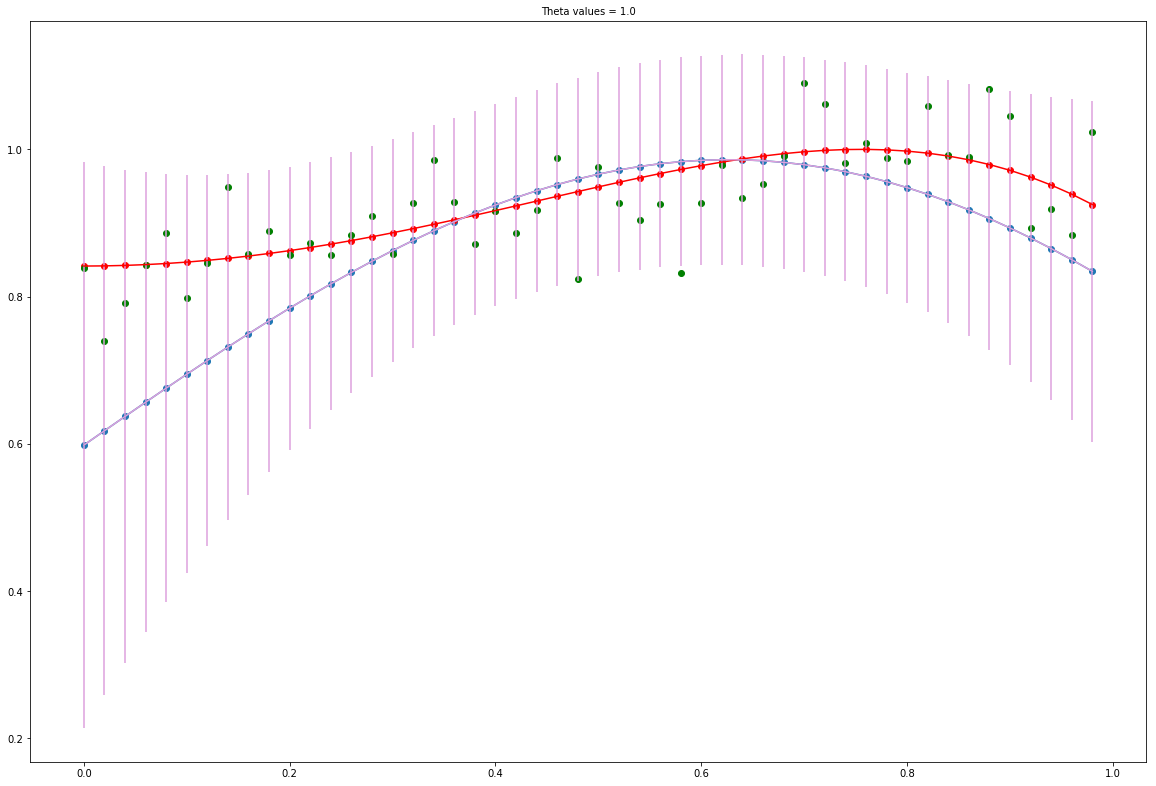

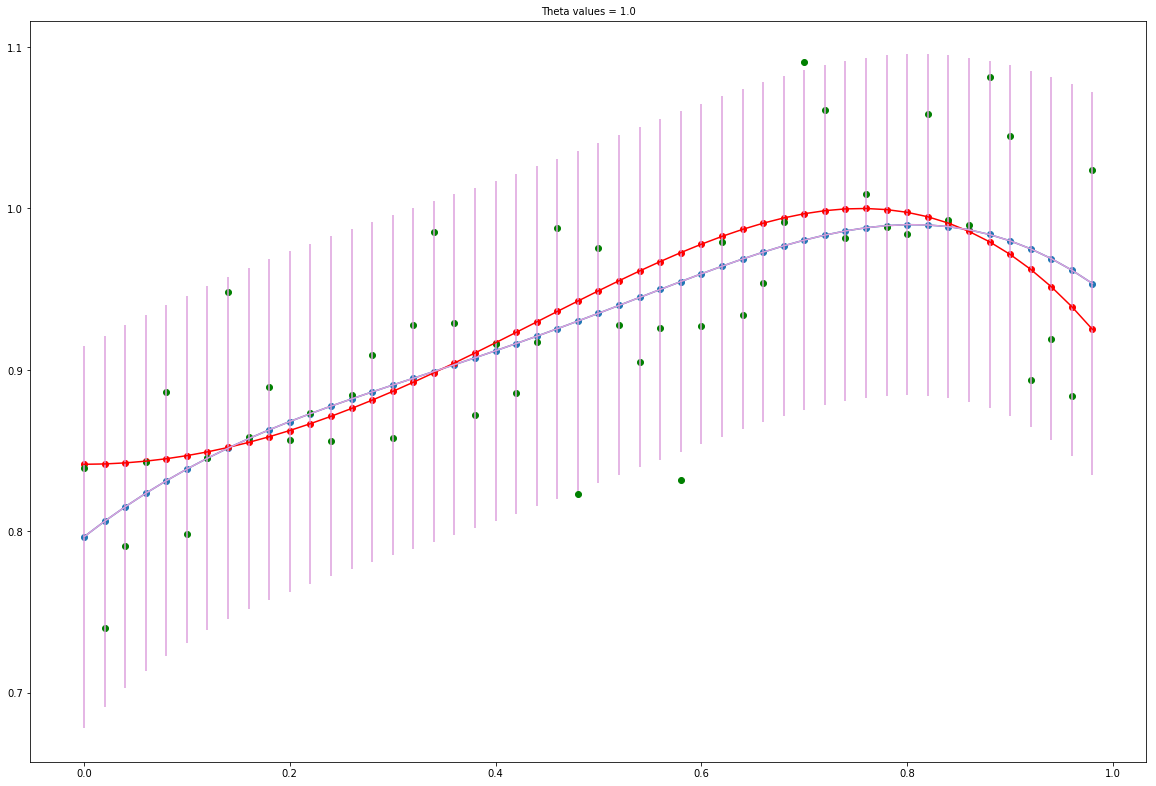

In [9]:
# Beta = 10
# 5th and 50th graph selected for viewing
plot_model(10,1.0, 4.0, 0.0, 0.0, [5,50])

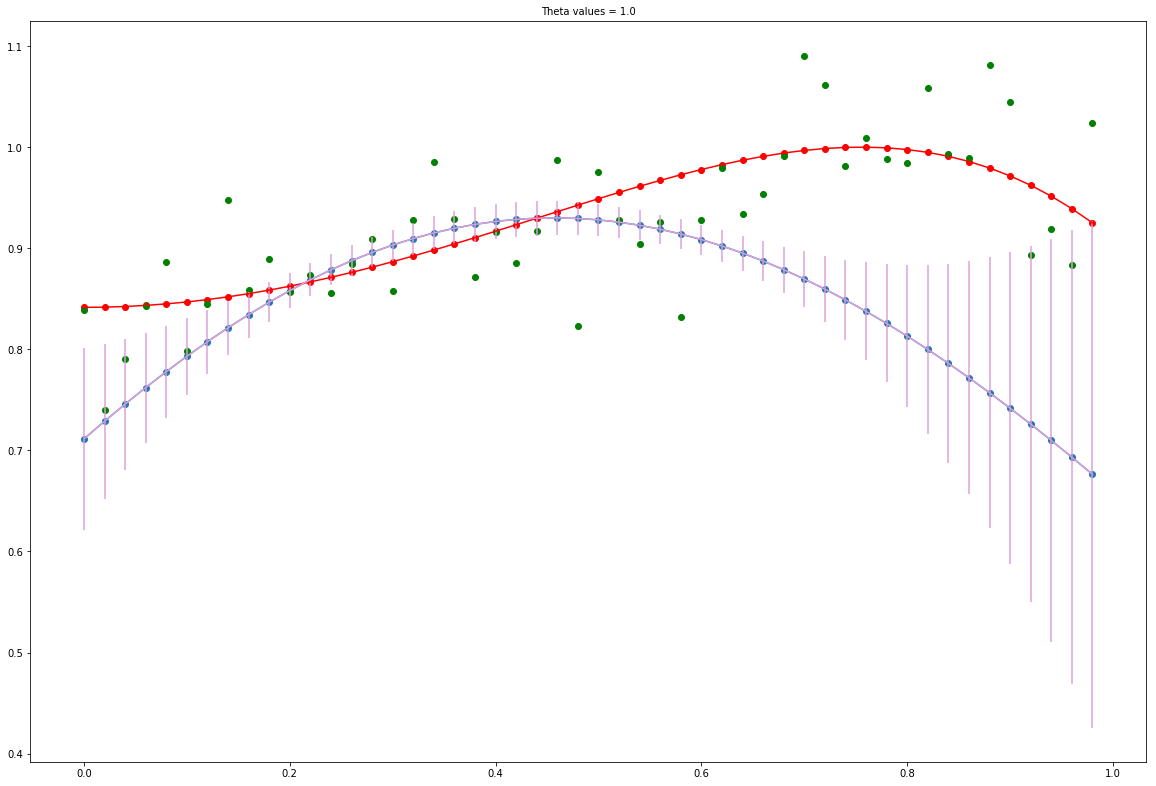

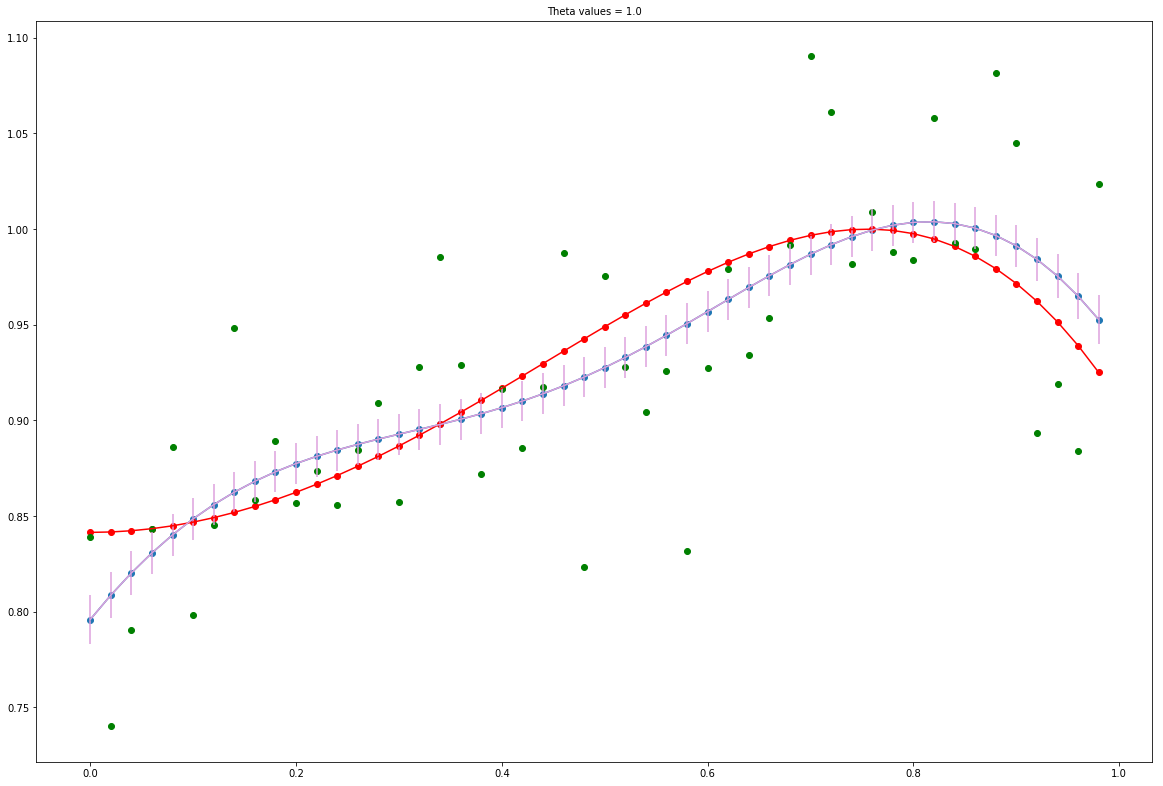

In [10]:
# Beta = 100
# 5th and 50th graph selected for viewing
plot_model(100,1.0, 4.0, 0.0, 0.0, [5,50])

#### Explanation: 
Beta is related to the distribution of error uncertainty about the plotted point and hence we observe that with a larger beta, the greater this distrubution and hence the wider the errorbar plot.

### Change kernel parameters to 1.0, 64.0, 10.0, 5.0

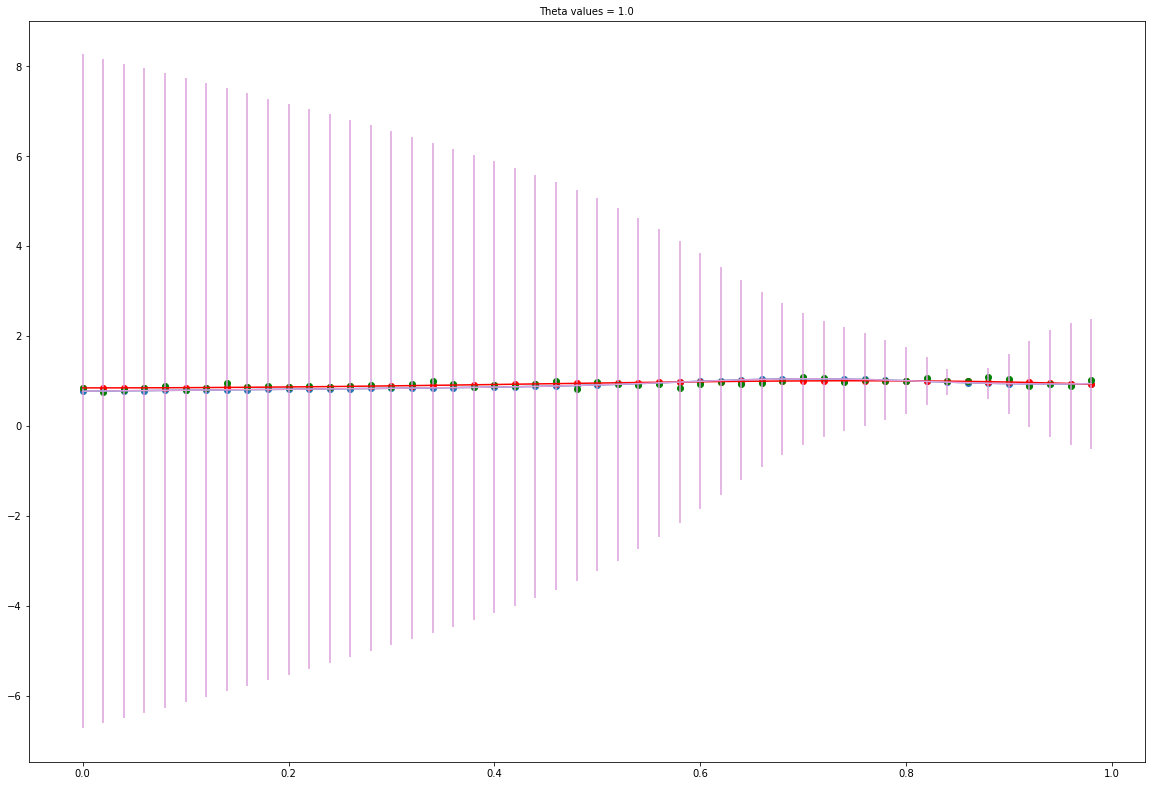

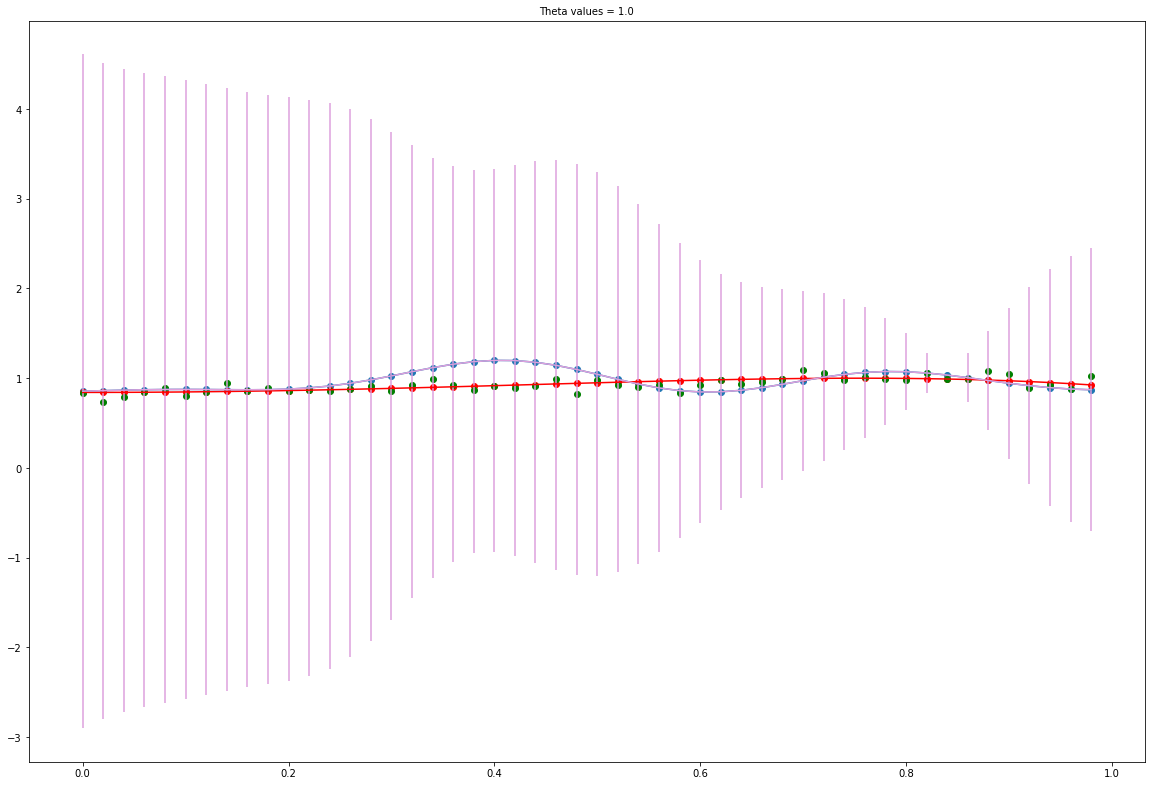

In [13]:
# Selected 5th and 50th graph for viewing
plot_model(10,1.0, 64.0, 10.0, 5.0, [5,50])

### Explanation: 
It is obvious that with such a huge theta 2, the graph will be overfitted since theta 2 increases each k(x_m, x_n) in the matrix k. The flunctuations are hence greater due to greater sensitivity to the position of Y_noise.


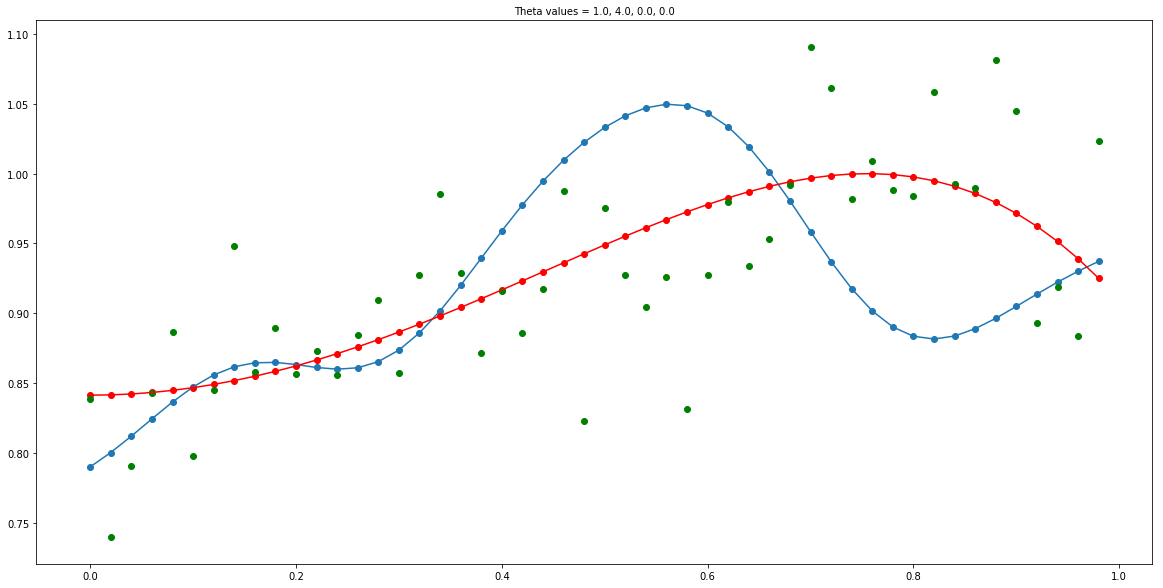

In [15]:
### Demonstration of the overfitting with large values of theta

### Change kernel parameters to 1.0, 0.25, 0.0, 0.0

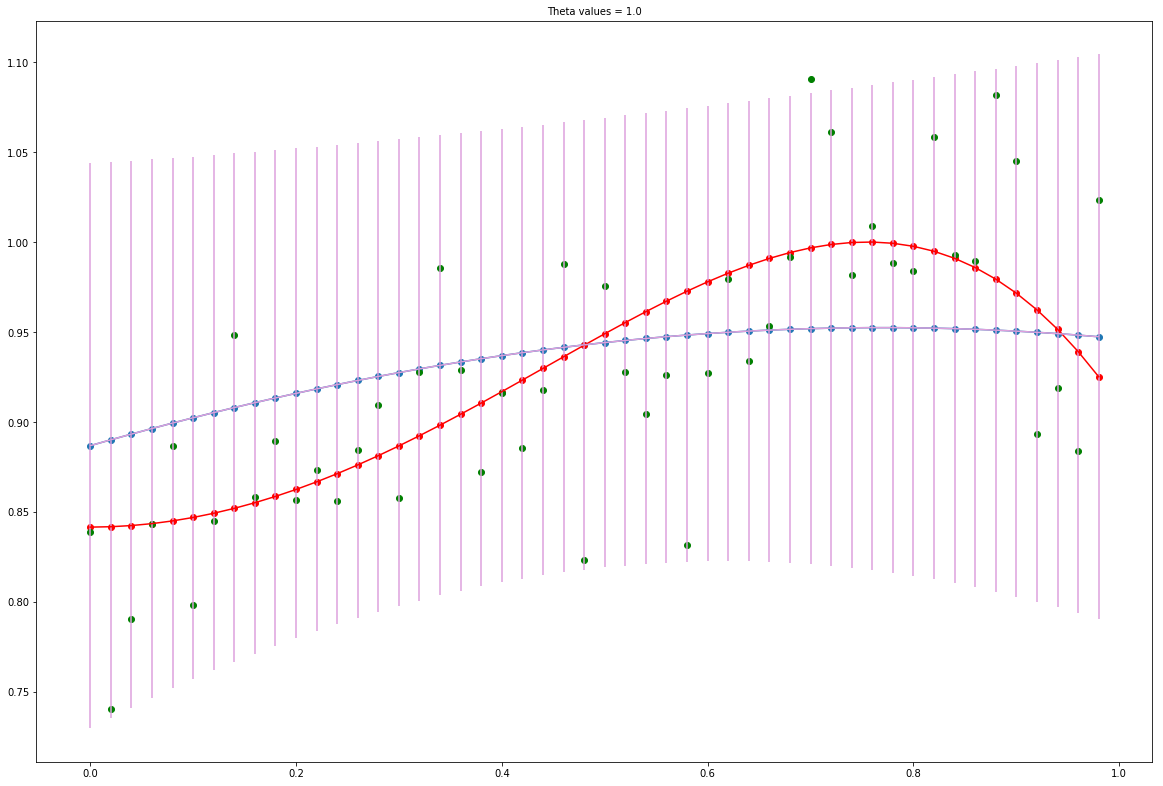

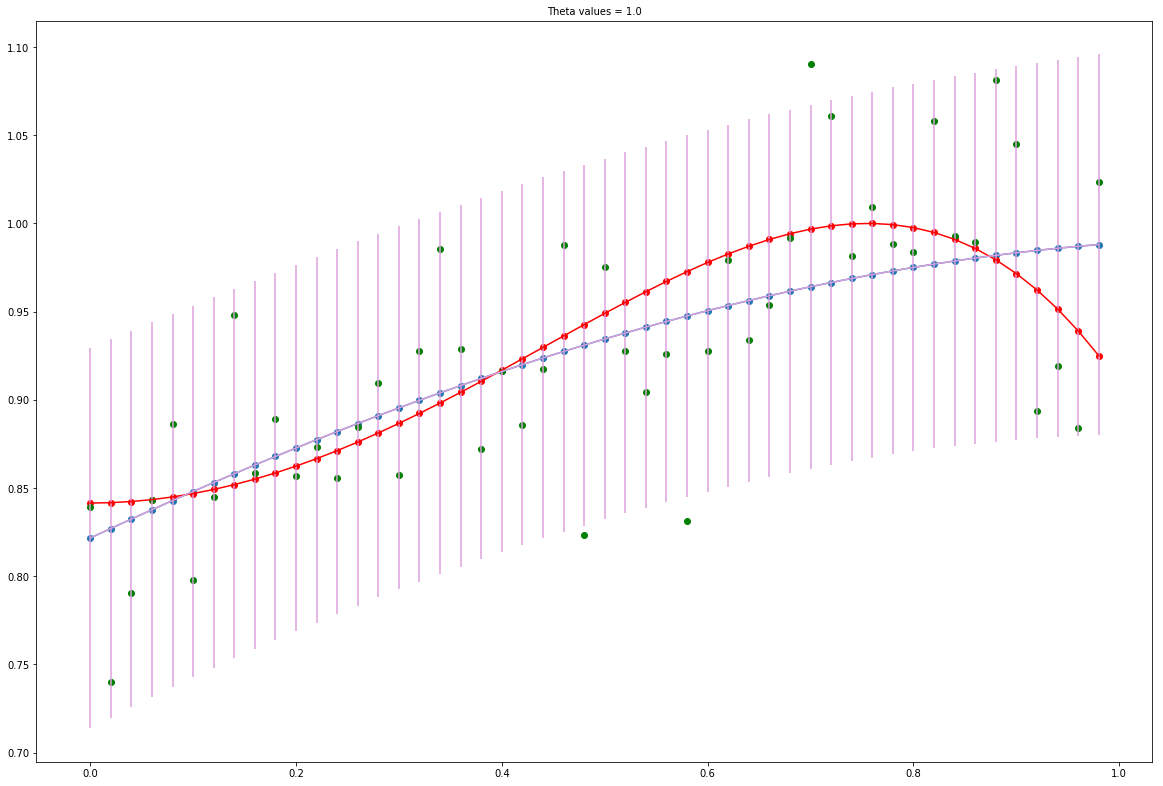

In [16]:
# Selected 5th and 50th graph for viewing
plot_model(10,1.0, 0.25, 0.0, 0.0, [5,50])

### Explanation: 
Decreasing the theta 2, the graph will be underfitted since there is decreased sensitivity to the position of Y_noise.
